# Project Description:Twitter US Airline Sentiment

# Data Description:

- A sentiment analysis job about the problems of each major U.S. airline.
- Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

# Dataset:

- The project is from a dataset from Kaggle.
- Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentiment
- The dataset has to be downloaded from the above Kagglewebsite.

# Objective:

- To implement the techniques learnt as a part of the course.

# Learning Outcomes:
- Basic understanding of text pre-processing.
- What to do after text pre-processing:
    - Bag of words
    - Tf-idf
- Build the classification model.
- Evaluate the Model performance.

In [1]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

     |████████████████████████████████| 245kB 3.7MB/s 
     |████████████████████████████████| 317kB 16.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81699 sha256=271d96eecb29c0e30849d49349f143bd9ecb37e1edb91a23a3e144c801c86fd7
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Loading data into pandas dataframe
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/Tweets.csv")

In [4]:
data.shape                                               # print shape of data.

(14640, 15)

In [5]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
data = data[['text', 'airline_sentiment']]

In [11]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [12]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [13]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

# Data Pre-processing:

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data
- We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [14]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [15]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [16]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [17]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [18]:
data.head()                                                                    # Look at how tokenized data looks.

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [19]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [20]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


In [21]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)                # Keep only 5000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [22]:
data_features.shape

(14640, 5000)

In [24]:
X = data_features

y = data.airline_sentiment

In [25]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7192622950819672


## George's Tip
- RandomForestClassifier in sklearn doesn't need labels to be onehot encoded.
- https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/#:~:text=TL%3BDR%20Decision%20tree%20models,seriously%20degrade%20tree%2Dmodel%20performance.

## George's Challenge
Why use `X, y` in cross-validaation? Why not `X_test, y_test`?

In [28]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[2554  201   59]
 [ 412  406   66]
 [ 217  108  369]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


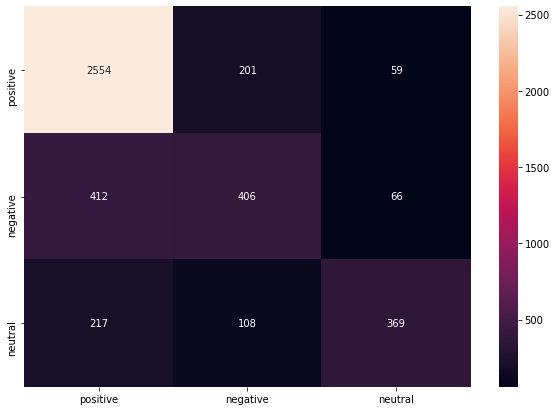

In [29]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [30]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 5000)

## George's Challenge
- What's the difference between `CountVectorizer` and `TfidfVectorizer`?
- Which is better?

In [31]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7188524590163935


In [32]:
result = forest.predict(X_test)

## George's Challenge
10-fold cv vs. one-time test result, which is more preferrable? Why?

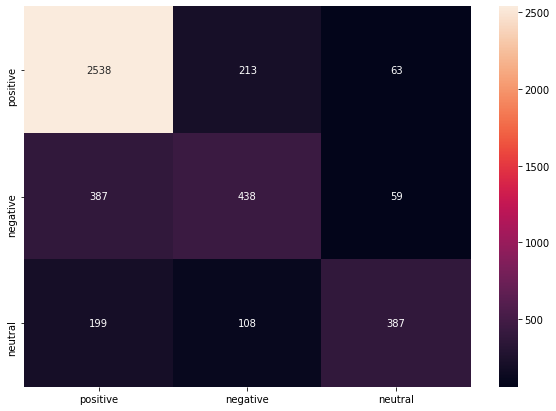

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Summary:

- We used dataset which has tweets in text format and their sentiment type (positive, negative and neutral).
- The goal was to build a model for text-classification.
- We Pre-processed the data using variuos techniques and libraries.
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.
- After building the classification model, we predicted the result for the test data.
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- One more way to increase accuracy is to use different variations of Pre-processing techniques.

## George's Challenge
What are some ideas to improve the model by using different preprocessing techniques?

# George's Bonus $$$
**Use Pre trained word embeddings for text classification**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, load_model
#from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Activation, Embedding, GlobalMaxPooling1D, Dropout, Conv1D, Concatenate, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

In [2]:
# Loading data into pandas dataframe
df = pd.read_csv("Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df = df[['text', 'airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [4]:
X, y = df['text'], df['airline_sentiment']

In [5]:
y = pd.get_dummies(y, drop_first=False).values
y

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [6]:
# vocabulary
results = set()
df['text'].str.lower().str.split().apply(results.update)
len(results)

26840

In [7]:
# max length
X.str.split().apply(len).max()

36

In [8]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(X)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X)
# pad documents to a max length of 36 words
max_length = 36
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [9]:
padded_docs

array([[  81,   62, 6686, ...,    0,    0,    0],
       [  81,  558,  590, ...,    0,    0,    0],
       [  81,    3,  207, ...,    0,    0,    0],
       ...,
       [  13,   75,  661, ...,    0,    0,    0],
       [  13,    6,   22, ...,    0,    0,    0],
       [  13,   41,   22, ...,    0,    0,    0]], dtype=int32)

In [10]:
# https://nlp.stanford.edu/projects/glove/

# load the whole embedding into memory
embeddings_index = dict()
f = open('/home/george/glove.6B/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32' )
    embeddings_index[word] = coefs
f.close()
print(f'Loaded {len(embeddings_index)} word vectors.')

Loaded 400000 word vectors.


In [12]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [13]:
# create the model
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size, 
        output_dim=100, 
        input_length=max_length,
        weights=[embedding_matrix],
        trainable=False
        )
    )
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
    )
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 36, 100)           1576900   
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               360100    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 1,937,303
Trainable params: 360,403
Non-trainable params: 1,576,900
_________________________________________________________________
None


Train on 13176 samples, validate on 1464 samples
Epoch 1/30
13176/13176 [==============================] - 5s 367us/sample - loss: 0.7198 - accuracy: 0.7048 - val_loss: 0.4963 - val_accuracy: 0.8115
Epoch 2/30
13176/13176 [==============================] - 2s 138us/sample - loss: 0.5701 - accuracy: 0.7669 - val_loss: 0.5138 - val_accuracy: 0.7958
Epoch 3/30
13176/13176 [==============================] - 2s 136us/sample - loss: 0.4726 - accuracy: 0.8122 - val_loss: 0.6066 - val_accuracy: 0.7398
Epoch 4/30
13176/13176 [==============================] - 2s 127us/sample - loss: 0.3707 - accuracy: 0.8574 - val_loss: 0.5599 - val_accuracy: 0.7684
Epoch 5/30
13176/13176 [==============================] - 2s 134us/sample - loss: 0.2708 - accuracy: 0.9023 - val_loss: 0.6257 - val_accuracy: 0.7712
Epoch 6/30
13176/13176 [==============================] - 2s 137us/sample - loss: 0.1824 - accuracy: 0.9414 - val_loss: 0.6854 - val_accuracy: 0.7623
Epoch 7/30
13176/13176 [===========================

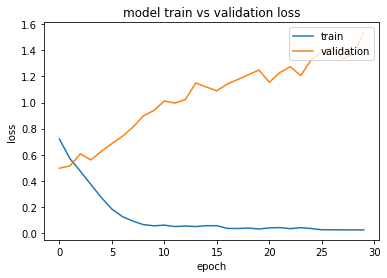

In [14]:
# fit the model
history = model.fit(padded_docs, y, validation_split=0.1, epochs=30, verbose=1)

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# evaluate the model
#loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
#print( ' Accuracy: %f ' % (accuracy*100))

Train on 13176 samples, validate on 1464 samples
Epoch 1/30
13176/13176 [==============================] - 2s 183us/sample - loss: 0.7647 - accuracy: 0.6847 - val_loss: 0.6603 - val_accuracy: 0.7548
Epoch 2/30
13176/13176 [==============================] - 2s 151us/sample - loss: 0.6223 - accuracy: 0.7426 - val_loss: 0.5063 - val_accuracy: 0.8135
Epoch 3/30
13176/13176 [==============================] - 2s 139us/sample - loss: 0.5486 - accuracy: 0.7793 - val_loss: 0.5802 - val_accuracy: 0.7698
Epoch 4/30
13176/13176 [==============================] - 2s 135us/sample - loss: 0.4799 - accuracy: 0.8083 - val_loss: 0.5334 - val_accuracy: 0.7917
Epoch 5/30
13176/13176 [==============================] - 2s 143us/sample - loss: 0.4192 - accuracy: 0.8373 - val_loss: 0.5051 - val_accuracy: 0.8074
Epoch 6/30
13176/13176 [==============================] - 2s 148us/sample - loss: 0.3604 - accuracy: 0.8623 - val_loss: 0.5846 - val_accuracy: 0.7616
Epoch 7/30
13176/13176 [===========================

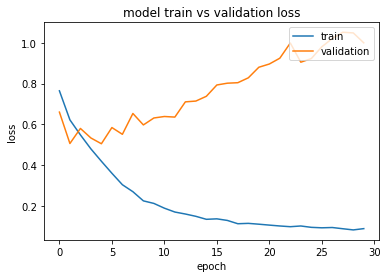

In [15]:
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size, 
        output_dim=100, 
        input_length=max_length,
        weights=[embedding_matrix],
        trainable=False
        )
    )
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
    )

history = model.fit(padded_docs, y, validation_split=0.1, epochs=30, verbose=1)

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

Train on 13176 samples, validate on 1464 samples
Epoch 1/30
13176/13176 [==============================] - 2s 166us/sample - loss: 0.7792 - accuracy: 0.6814 - val_loss: 0.6341 - val_accuracy: 0.7930
Epoch 2/30
13176/13176 [==============================] - 2s 124us/sample - loss: 0.6676 - accuracy: 0.7273 - val_loss: 0.5135 - val_accuracy: 0.8217
Epoch 3/30
13176/13176 [==============================] - 2s 134us/sample - loss: 0.6106 - accuracy: 0.7508 - val_loss: 0.5449 - val_accuracy: 0.8156
Epoch 4/30
13176/13176 [==============================] - 2s 136us/sample - loss: 0.5726 - accuracy: 0.7685 - val_loss: 0.5019 - val_accuracy: 0.8012
Epoch 5/30
13176/13176 [==============================] - 2s 140us/sample - loss: 0.5428 - accuracy: 0.7797 - val_loss: 0.5010 - val_accuracy: 0.8122
Epoch 6/30
13176/13176 [==============================] - 2s 139us/sample - loss: 0.5069 - accuracy: 0.7940 - val_loss: 0.4822 - val_accuracy: 0.8183
Epoch 7/30
13176/13176 [===========================

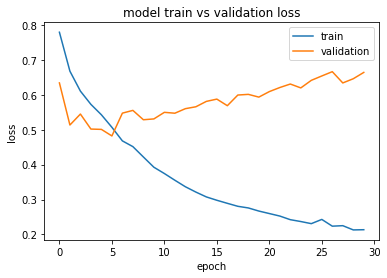

In [17]:
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size, 
        output_dim=100, 
        input_length=max_length,
        weights=[embedding_matrix],
        trainable=False
        )
    )
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
    )

history = model.fit(padded_docs, y, validation_split=0.1, epochs=30, verbose=1)

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

Train on 13176 samples, validate on 1464 samples
Epoch 1/30
13176/13176 [==============================] - 3s 195us/sample - loss: 0.9899 - accuracy: 0.6777 - val_loss: 0.7615 - val_accuracy: 0.7944
Epoch 2/30
13176/13176 [==============================] - 2s 150us/sample - loss: 0.8369 - accuracy: 0.7179 - val_loss: 0.7467 - val_accuracy: 0.8040
Epoch 3/30
13176/13176 [==============================] - 2s 141us/sample - loss: 0.8105 - accuracy: 0.7306 - val_loss: 0.7002 - val_accuracy: 0.8046
Epoch 4/30
13176/13176 [==============================] - 2s 161us/sample - loss: 0.8037 - accuracy: 0.7290 - val_loss: 0.6516 - val_accuracy: 0.8169
Epoch 5/30
13176/13176 [==============================] - 2s 161us/sample - loss: 0.7878 - accuracy: 0.7405 - val_loss: 0.6957 - val_accuracy: 0.8019
Epoch 6/30
13176/13176 [==============================] - 2s 157us/sample - loss: 0.7964 - accuracy: 0.7379 - val_loss: 0.6696 - val_accuracy: 0.8108
Epoch 7/30
13176/13176 [===========================

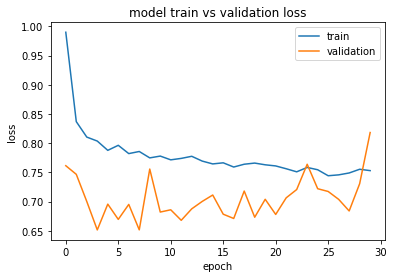

In [18]:
model = Sequential()
model.add(
    Embedding(
        input_dim=vocab_size, 
        output_dim=100, 
        input_length=max_length,
        weights=[embedding_matrix],
        trainable=False
        )
    )
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(
    100, 
    kernel_regularizer=regularizers.l2(0.002),
    activation='relu'
))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
    )

history = model.fit(padded_docs, y, validation_split=0.1, epochs=30, verbose=1)

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()